In [3]:
#some necessary imports
import pandas as pd
import numpy as np

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

Data Prep

In [1]:

#transform the data into a dataframe
df = pd.read_csv(data)

NameError: name 'pd' is not defined

In [6]:

# take a look at the data
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [7]:
#transform the column names to lowercase
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [8]:

df['make'].str.lower().str.replace(' ', '_')

0            bmw
1            bmw
2            bmw
3            bmw
4            bmw
          ...   
11909      acura
11910      acura
11911      acura
11912      acura
11913    lincoln
Name: make, Length: 11914, dtype: object

In [9]:
 #find all string columns in the dataframe
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [10]:

for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [11]:
#check the changes
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

2.3 Exploratory data analysis

In [13]:
#explore the data
for col in df.columns:
    print(col)
    print(df[col].unique()[:5]) #print first 5 unique values
    print(df[col].nunique()) #print number of unique values
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

In [14]:
#explore the numerical data
df.describe()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [15]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


Distribution of price

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

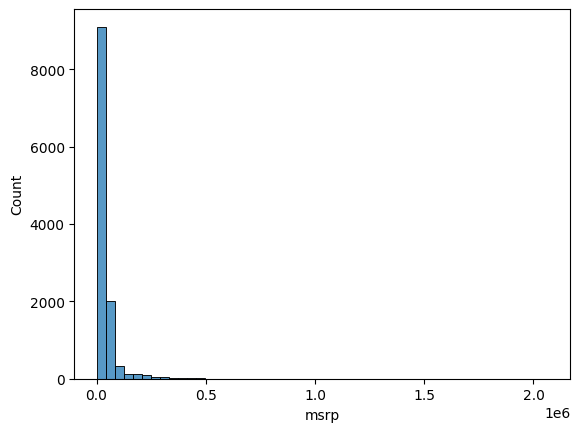

In [20]:

sns.histplot(df.msrp, bins=50)

<Axes: xlabel='msrp', ylabel='Count'>

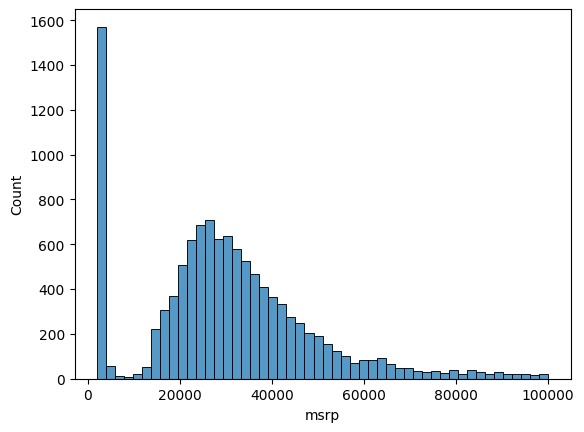

In [21]:
#msrp has some extreme values, let's limit the x axis
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

long tail detected(which is really dangarous to our model).>>>>> use log transformation to get rid of it

In [22]:
np.log1p([0, 1, 10, 1000, 100000])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [23]:
 #manual log transformation
 
np.log([0 + 1, 1+ 1, 10 + 1, 1000 + 1, 100000])
 

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51292546])

In [24]:
#apply log transformation to the msrp column
price_logs = np.log1p(df.msrp)

<Axes: xlabel='msrp', ylabel='Count'>

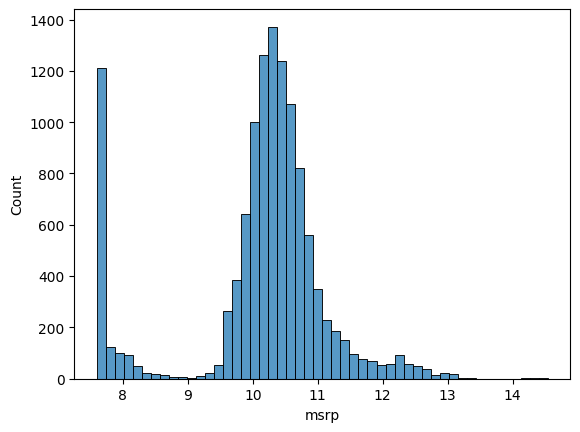

In [26]:
#plot the log transformed prices
sns.histplot(price_logs, bins=50)


Missing values

In [27]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64


2.4 Setting up the validation framework

In [35]:
#split the data into train, val, test sets

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [36]:
n

11914

In [37]:

n_val, n_test, n_train

(2382, 2382, 7150)

In [38]:
# iloc to get the first 5 rows of the dataframe
df.iloc[[10, 0, 3, 5]]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
10,mercedes-benz,190-class,1991,regular_unleaded,130.0,4.0,manual,rear_wheel_drive,4.0,luxury,compact,sedan,26,18,617,2000
0,lotus,evora_400,2017,premium_unleaded_(required),400.0,6.0,manual,rear_wheel_drive,2.0,"exotic,high-performance",compact,coupe,39,21,613,91900
3,suzuki,samurai,1993,regular_unleaded,66.0,4.0,manual,four_wheel_drive,2.0,NaN,compact,convertible_suv,26,24,481,2000
5,gmc,savana_cargo,2015,flex-fuel_(unleaded/e85),285.0,8.0,automatic,rear_wheel_drive,3.0,flex_fuel,large,cargo_van,17,11,549,33760


In [39]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [40]:
# create an index array for the training set -this helps in shuffling the data
idx = np.arange(n)

In [41]:
np.random.seed(2)
np.random.shuffle(idx)

In [42]:

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [43]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [44]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [45]:

y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [46]:
# remove the target variable from the dataframesm to avoid data leakage
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [47]:
len(y_train), len(y_val), len(y_test)

(7150, 2382, 2382)

2.5 Linear regression

In [48]:
df_train.iloc[10]

make                            nissan
model                            versa
year                              2015
engine_fuel_type      regular_unleaded
engine_hp                        109.0
engine_cylinders                   4.0
transmission_type            automatic
driven_wheels        front_wheel_drive
number_of_doors                    4.0
market_category                    NaN
vehicle_size                   compact
vehicle_style                    sedan
highway_mpg                         40
city_mpg                            31
popularity                        2009
Name: 10, dtype: object

In [50]:
#initialize the parameters (weights ,constant and bias)
xi = [453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [51]:
#function to make predictions using linear regression
def linear_regression(xi):
    n = len(xi)

    pred = w0

    for j in range(n):
        pred = pred + w[j] * xi[j]

    return pred

In [53]:
#initialize the parameters for a data point
xi = [453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [55]:
#make prediction for the data point
linear_regression(xi)

12.312

In [56]:
# Make a prediction for the data point
#this is in log scale
np.expm1(12.312)

np.float64(222347.2221101062)

In [57]:

np.log1p(222347.2221101062)

np.float64(12.312)

2.6 Linear regression vector form

In [60]:
#function to compute the dot product
def dot(xi, w):
    n = len(xi)
    
    res = 0.0
    
    for j in range(n):
        res = res + xi[j] * w[j]
    
    return res

In [61]:
#function to make predictions using linear regression
def linear_regression(xi):
    return w0 + dot(xi, w)

In [63]:
# Add the bias term to the weights
w_new = [w0] + w

In [64]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [65]:
#function to make predictions using linear regression
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [67]:
linear_regression(xi) #should give the same result as before

12.312

In [68]:
#different way of adding bias term
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

In [70]:
# this is for several data points
x1  = [1, 148, 24, 1385]
x2  = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [72]:

#function to make predictions using linear regression for the mutliple data points
def linear_regression(X):
    return X.dot(w_new)

In [73]:
# Make predictions for multiple data points
linear_regression(X)

array([12.38 , 13.552, 12.312])

2.7 Training a linear regression model

In [74]:
def train_linear_regression(X, y):
    pass

In [75]:
# Example data points
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [76]:
# Add a column of ones to X for the bias term
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [77]:
# Add a column of ones to X for the bias term
X = np.column_stack([ones, X])

In [78]:
# Target values
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [79]:
# Closed-form solution (normal equation) to find the weights
XTX = X.T.dot(X)
XTX_inv = np.linalg.inv(XTX)
w_full = XTX_inv.dot(X.T).dot(y)

In [80]:
#split the weights into bias and other weights
w0 = w_full[0]
w = w_full[1:]

In [81]:

w0, w

(np.float64(25844.754055766753),
 array([ -16.08906468, -199.47254894,   -1.22802883]))

In [96]:
# #function to train linear regression using closed-form solution
# def train_linear_regression(X, y):
#     ones = np.ones(X.shape[0])
#     X = np.column_stack([ones, X])

#     XTX = X.T.dot(X)
#     XTX_inv = np.linalg.inv(XTX)
#     w_full = XTX_inv.dot(X.T).dot(y)
    
#     return w_full[0], w_full[1:]
#ths code throws an error when XTX is non-invertible since our  matrix XTX is singular (non-invertible),

In [95]:
#Use Pseudoinverse (More Numerically Stable): Handles Singular/Non-Invertible Matrices
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    # Use pseudoinverse instead of regular inverse
    w_full = np.linalg.pinv(X).dot(y)
    return w_full[0], w_full[1:]

In [93]:
train_linear_regression(X, y)

(np.float64(12922.37702788169),
 array([ 1.29223770e+04, -1.60890647e+01, -1.99472549e+02, -1.22802883e+00]))

2.8 Car price baseline model

In [97]:

df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [100]:
#select the base features for training
base = ['engine_hp', 'engine_cylinders', 'highway_mpg',
        'city_mpg', 'popularity']

X_train = df_train[base].fillna(0).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

In [101]:
w0 

np.float64(7.888773546165402)

In [102]:
w

array([ 9.39068342e-03, -1.39347309e-01,  1.54974659e-02,  1.44732779e-02,
       -1.29499046e-05])

<Axes: ylabel='Count'>

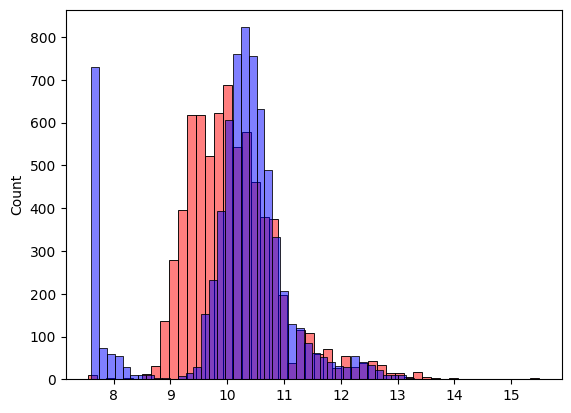

In [104]:
#make plots to compare the predicted and actual values
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)


2.9 RMSE

In [105]:
#rmse is  used to evaluate the model

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [106]:

rmse(y_train, y_pred)

np.float64(0.7538962120954686)


2.10 Validating the model

In [107]:
#function to prepare the feature matrix
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [108]:
# this is for training set
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.7277541937284504)

2.11 Simple feature engineering

In [109]:
#function to prepare the feature matrix
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df['year']
    features = base + ['age']
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [111]:
# this is for training set
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.5011967735169415)

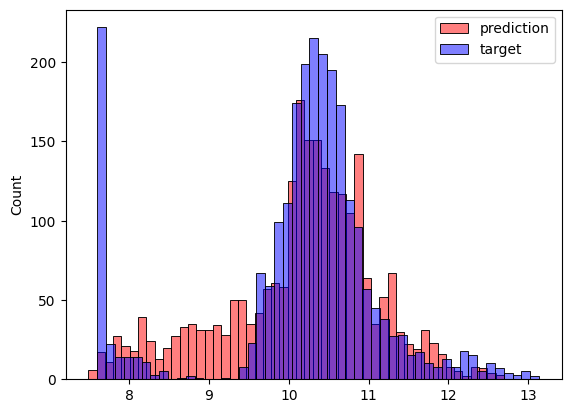

In [112]:
#make plots to compare the predicted and actual values
sns.histplot(y_pred, label='prediction', color='red', alpha=0.5, bins=50)
sns.histplot(y_val, label='target', color='blue',  alpha=0.5, bins=50)
plt.legend()


2.12 Categorical variables

In [113]:
#identify the most popular categories in categorical columns
categorical_columns = [
    'make', 'model', 'engine_fuel_type', 'driven_wheels', 'market_category',
    'vehicle_size', 'vehicle_style']

categorical = {}

for c in categorical_columns:
    categorical[c] = list(df_train[c].value_counts().head().index)

In [114]:
#function to prepare the feature matrix
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df['year']
    features = base + ['age']

    for v in [2, 3, 4]:
        df['num_doors_%d' % v] = (df.number_of_doors == v).astype(int)
        features.append('num_doors_%d' % v)

    for name, values in categorical.items():
        for value in values:
            df['%s_%s' % (name, value)] = (df[name] == value).astype(int)
            features.append('%s_%s' % (name, value))

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [115]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.4438477440880916)

In [116]:

w0, w

(np.float64(7.302399413304952),
 array([ 1.81765452e-03,  1.23927018e-01, -5.26458950e-03,  6.54948638e-03,
        -5.51177971e-05, -9.59809059e-02, -1.39156929e+00, -1.46123918e+00,
        -1.15071942e+00, -3.72030522e-02,  1.83385625e-01, -1.37728792e-02,
         6.07185004e-02, -1.12401465e-01, -2.88580961e-01, -5.93908166e-01,
        -3.35019740e-01, -3.49938590e-01, -2.95026885e-01, -7.51796201e-01,
        -1.97715476e-01, -6.13277217e-01, -7.89470881e-01, -4.11703987e-01,
         1.84095494e+00,  1.78049312e+00,  1.86465282e+00,  1.81629852e+00,
        -4.77504254e-02,  1.50778359e-01, -5.09939523e-03, -5.37948571e-03,
         1.54371802e-02,  2.46502444e+00,  2.39407307e+00,  2.44330190e+00,
        -1.24123911e-01,  1.96382467e-03,  1.90791267e-01,  3.73117879e-01,
        -2.61031144e-01]))

2.13 Regularization

In [117]:
#regularization-it is a technique used to prevent overfitting by adding a penalty term to the loss function.

In [118]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5.00000001],
]

X = np.array(X)
X

array([[4.        , 4.        , 4.        ],
       [3.        , 5.        , 5.        ],
       [5.        , 1.        , 1.        ],
       [5.        , 4.        , 4.        ],
       [7.        , 5.        , 5.        ],
       [4.        , 5.        , 5.00000001]])

In [119]:
# Target values
y= [1, 2, 3, 1, 2, 3]

In [120]:
# Closed-form solution (normal equation) to find the weights
XTX = X.T.dot(X)
XTX

array([[140.        , 111.        , 111.00000004],
       [111.        , 108.        , 108.00000005],
       [111.00000004, 108.00000005, 108.0000001 ]])

In [125]:
# XTX_inv = np.linalg.inv(XTX)
#throws an error when XTX is non-invertible because because XTX (X transpose X) is a singular matrix. 

In [133]:
def analyze_matrix(X):
    ones = np.ones(X.shape[0])
    X_augmented = np.column_stack([ones, X])
    XTX = X_augmented.T.dot(X_augmented)
    
    print("=== MATRIX ANALYSIS ===")
    print(f"XTX shape: {XTX.shape}")
    print(f"Rank: {np.linalg.matrix_rank(XTX)}")
    
    # SVD decomposition
    U, s, Vt = np.linalg.svd(XTX)
    print(f"Singular values: {s}")
    print(f"Condition number: {s[0]/s[-1]}")
    
    # Check what makes it singular
    print(f"Zero singular values: {np.sum(s < 1e-10)}")
    
    return U, s, Vt

U, s, Vt = analyze_matrix(X)

=== MATRIX ANALYSIS ===
XTX shape: (4, 4)
Rank: 3
Singular values: [3.45215890e+02 1.65509848e+01 2.33125407e-01 7.53666263e-15]
Condition number: 4.58048750170179e+16
Zero singular values: 1


In [ ]:
XTX_inv.dot(X.T).dot(y)

array([[ 0.03858521, -0.01982851, -0.01982851],
       [-0.01982851,  0.01250447,  0.01250447],
       [-0.01982851,  0.01250447,  0.01250447]])

In [135]:

XTX_inv.dot(X.T).dot(y)

array([0.33654877, 0.04001429, 0.04001429])

In [136]:
XTX = [
    [1, 2, 2],
    [2, 1, 1.0000001],
    [2, 1.0000001, 1]
]

XTX = np.array(XTX)

In [137]:
np.linalg.inv(XTX)

array([[-3.33333356e-01,  3.33333339e-01,  3.33333339e-01],
       [ 3.33333339e-01, -5.00000008e+06,  4.99999991e+06],
       [ 3.33333339e-01,  4.99999991e+06, -5.00000008e+06]])

In [138]:
XTX = XTX + 0.01 * np.eye(3)

In [139]:
np.linalg.inv(XTX)

array([[ -0.33668908,   0.33501399,   0.33501399],
       [  0.33501399,  49.91590897, -50.08509104],
       [  0.33501399, -50.08509104,  49.91590897]])

In [140]:
#function to train linear regression using closed-form solution with L2 regularization
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [141]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.4438413323017679)

2.14 Tuning the model

In [142]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, score)

0.0 6702569485752847.0 26.22657871653087
1e-05 7.302396025654688 0.4438477330044494
0.0001 7.302134522138308 0.44384767250864093
0.001 7.299710765618986 0.4438470347353343
0.0001 7.302134522138308 0.44384767250864093
0.001 7.299710765618986 0.4438470347353343
0.1 7.062455243360235 0.4438382207298465
0.1 7.062455243360235 0.4438382207298465
1 6.058217317088367 0.44494811339694884
10 4.6678001564969245 0.45480942154490556
1 6.058217317088367 0.44494811339694884
10 4.6678001564969245 0.45480942154490556


In [144]:
r = 0.001
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
score

np.float64(0.4438470347353343)

2.15 Using the model

In [145]:
df_full_train = pd.concat([df_train, df_val])

In [146]:
df_full_train = df_full_train.reset_index(drop=True)

In [147]:
X_full_train = prepare_X(df_full_train)

In [148]:
X_full_train

array([[ 99.,   4.,  46., ...,   0.,   0.,   1.],
       [292.,   8.,  20., ...,   0.,   0.,   0.],
       [184.,   4.,  36., ...,   0.,   0.,   0.],
       ...,
       [184.,   4.,  30., ...,   0.,   0.,   0.],
       [100.,   4.,  29., ...,   0.,   0.,   0.],
       [231.,   4.,  33., ...,   0.,   0.,   0.]], shape=(9532, 41))

In [149]:

y_full_train = np.concatenate([y_train, y_val])

In [150]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [151]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

np.float64(0.47006475732257114)

In [152]:
car = df_test.iloc[20].to_dict()
car

{'make': 'dodge',
 'model': 'ram_50_pickup',
 'year': 1991,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 116.0,
 'engine_cylinders': 4.0,
 'transmission_type': 'manual',
 'driven_wheels': 'four_wheel_drive',
 'number_of_doors': 2.0,
 'market_category': nan,
 'vehicle_size': 'compact',
 'vehicle_style': 'regular_cab_pickup',
 'highway_mpg': 20,
 'city_mpg': 17,
 'popularity': 1851}

In [153]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,dodge,ram_50_pickup,1991,regular_unleaded,116.0,4.0,manual,four_wheel_drive,2.0,NaN,compact,regular_cab_pickup,20,17,1851


In [154]:
X_small = prepare_X(df_small)

In [155]:
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
y_pred

np.float64(7.421369715675649)

In [156]:
np.expm1(y_pred)

np.float64(1670.321175473006)

In [157]:
np.expm1(y_test[20])

np.float64(2000.0)

2.17 Summary
EDA - looking at data, finding missing values
Target variable distribution - long tail => bell shaped curve
Validation framework: train/val/test split (helped us detect problems)
Normal equation - not magic, but math
Implemented it with numpy
RMSE to validate our model
Feature engineering: age, categorical features
Regularization to fight numerical instability